In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [70]:
#loading training dataset 
df_train_original = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

In [71]:
#exploration 
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3ca0cd0>,
      dtype=object)

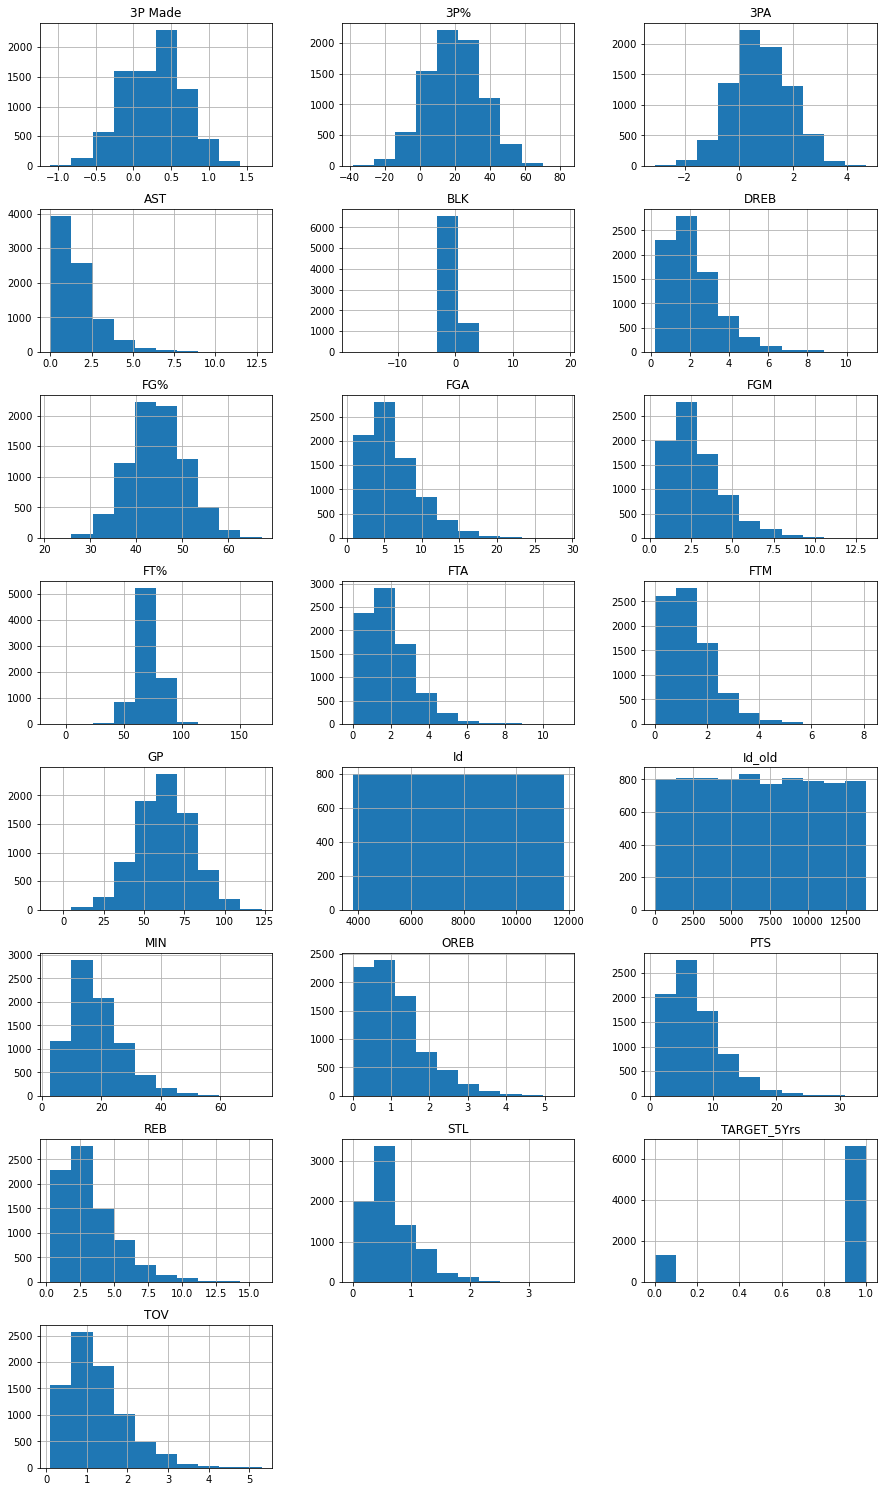

In [72]:
df_train_original.hist(figsize=(15,30),layout=(9,3))

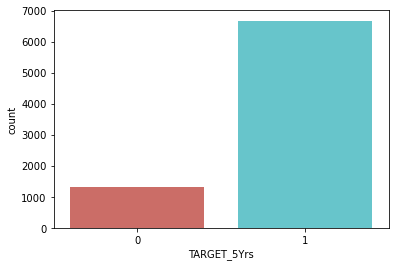

In [73]:
sns.countplot(x='TARGET_5Yrs',data=df_train_original, palette='hls')
plt.show()

In [74]:
#df_train.drop('Id', axis=1, inplace=True)
#df_train.drop('Id_old', axis=1, inplace=True)

In [75]:
# Save target variable
target = df_train_original.pop('TARGET_5Yrs')

In [76]:
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,...,1.392525,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000


In [77]:
#feature scaling
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train_original)

from joblib import dump
#Save the scaler into the folder models and call the file scaler.joblib
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

In [78]:
#Splitting the training data (80%) randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

x_train, x_val, y_train, y_val = train_test_split(df_train, target, test_size=0.2, random_state=8)

#save models 
np.save('../data/processed/X_train', x_train)
np.save('../data/processed/X_val',   x_val)
np.save('../data/processed/y_train', y_train)
np.save('../data/processed/y_val',   y_val)


In [79]:
#baseline model - logistic with no penality 
lr = LogisticRegression(penalty='none')
lr.fit(x_train, y_train)
y_val_preds = lr.predict(x_val)
y_val_preds_prob = lr.predict_proba(x_val)

#save model as logistic_base 
dump(lr,  '../models/logistic0.joblib')

['../models/logistic0.joblib']

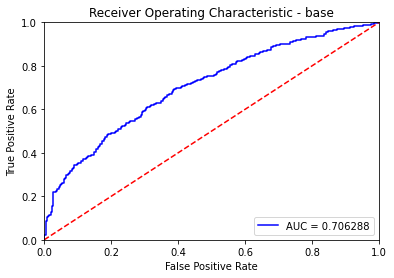

In [80]:
#AUC_ROC
preds = y_val_preds_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
np.round(lr.coef_,1)

array([[ 0. ,  0. ,  0.5,  0.1, -0.2,  0.3, -0.1,  0.1,  0.7, -0.7,  0. ,
        -0.3,  0.4,  0.1,  0.6,  0.5, -0.9,  0.2, -0. ,  0.1, -0.1]])

In [82]:
#LR1 - regularisation
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(x_train, y_train)
y_val_preds_l1 = lr_l1.predict(x_val)
y_val_preds_prob_l1 = lr_l1.predict_proba(x_val)

#save model as logistic_base 
dump(lr,  '../models/logistic_l1.joblib')

['../models/logistic_l1.joblib']

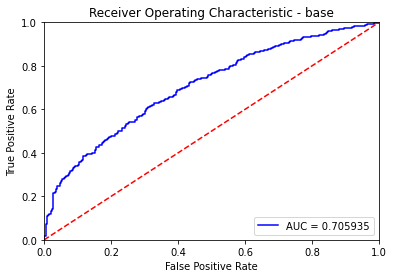

In [83]:
#AUC_ROC
preds_l1 = y_val_preds_prob_l1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_l1)
roc_auc_l1 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_l1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
np.round(lr_l1.coef_,1)

array([[ 0. ,  0. ,  0.5,  0.1,  0. ,  0. , -0. ,  0.2,  0.6, -0.6,  0. ,
        -0.1,  0.2,  0.1,  0.5,  0.1, -0.3,  0.2, -0. ,  0.1, -0.1]])

In [85]:
#LR2 - regularisation
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')
lr_l2.fit(x_train, y_train)
y_val_preds_l2 = lr_l2.predict(x_val)
y_val_preds_prob_l2 = lr_l2.predict_proba(x_val)

#save model as logistic 
dump(lr,  '../models/logistic_l2.joblib')

['../models/logistic_l2.joblib']

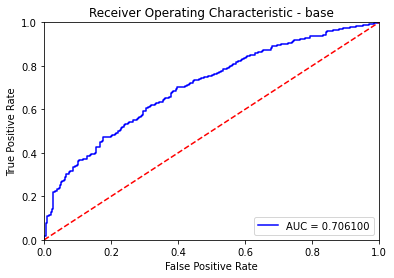

In [86]:
#AUC_ROC
preds_l2 = y_val_preds_prob_l2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_l2)
roc_auc_l2 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_l2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
np.round(lr_l2.coef_,1)

array([[ 0. ,  0. ,  0.5,  0.1, -0.1,  0.2, -0.1,  0.2,  0.7, -0.6,  0. ,
        -0.2,  0.3,  0.1,  0.5,  0.3, -0.6,  0.2, -0. ,  0.1, -0.1]])

In [88]:
#elasticnet - regularisation
lr_elastic = LogisticRegression(solver='saga')
lr_elastic.fit(x_train, y_train)
y_val_preds_elastic = lr_elastic.predict(x_val)
y_val_preds_prob_elastic = lr_elastic.predict_proba(x_val)

#save model as logistic 
dump(lr,  '../models/logistic_elastic.joblib')

['../models/logistic_elastic.joblib']

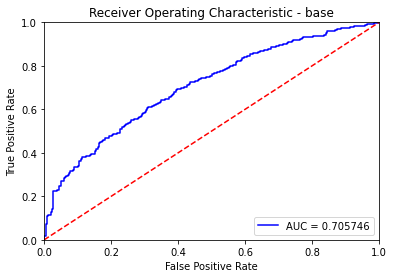

In [89]:
#AUC_ROC
preds_elastic = y_val_preds_prob_elastic[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_elastic)
roc_auc_elastic = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_elastic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
np.round(lr_elastic.coef_,1)

array([[ 0. ,  0. ,  0.5,  0.1, -0.1,  0.1, -0.1,  0.2,  0.7, -0.6,  0. ,
        -0.2,  0.3,  0.1,  0.5,  0.1, -0.4,  0.2, -0. ,  0.1, -0.1]])

In [99]:
#elasticnet - with l1 ratio
lr_elastic1 = LogisticRegression(penalty = 'elasticnet',l1_ratio=0.4, solver='saga')
lr_elastic1.fit(x_train, y_train)
y_val_preds_elastic1 = lr_elastic1.predict(x_val)
y_val_preds_prob_elastic1 = lr_elastic1.predict_proba(x_val)

#save model as logistic 
dump(lr,  '../models/logistic_elastic1.joblib')

['../models/logistic_elastic1.joblib']

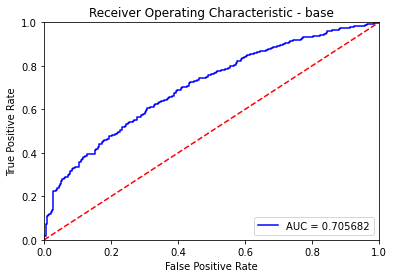

In [100]:
#AUC_ROC
preds_elastic1 = y_val_preds_prob_elastic1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_elastic1)
roc_auc_elastic = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_elastic1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
np.round(lr_elastic1.coef_,1)

array([[ 0. ,  0. ,  0.5,  0.1, -0. ,  0. , -0.1,  0.2,  0.6, -0.6,  0. ,
        -0.2,  0.2,  0.1,  0.5,  0.1, -0.3,  0.2, -0. ,  0.1, -0.1]])

In [102]:
co_efficients=np.vstack((np.round(lr.coef_,1),np.round(lr_l1.coef_,1),np.round(lr_l2.coef_,1),np.round(lr_elastic.coef_,1),np.round(lr_elastic1.coef_,1)))

In [103]:
pd.DataFrame(co_efficients, columns=df_train_original.columns)

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.0,0.0,0.5,0.1,-0.2,0.3,-0.1,0.1,0.7,-0.7,...,-0.3,0.4,0.1,0.6,0.5,-0.9,0.2,-0.0,0.1,-0.1
1,0.0,0.0,0.5,0.1,0.0,0.0,-0.0,0.2,0.6,-0.6,...,-0.1,0.2,0.1,0.5,0.1,-0.3,0.2,-0.0,0.1,-0.1
2,0.0,0.0,0.5,0.1,-0.1,0.2,-0.1,0.2,0.7,-0.6,...,-0.2,0.3,0.1,0.5,0.3,-0.6,0.2,-0.0,0.1,-0.1
3,0.0,0.0,0.5,0.1,-0.1,0.1,-0.1,0.2,0.7,-0.6,...,-0.2,0.3,0.1,0.5,0.1,-0.4,0.2,-0.0,0.1,-0.1
4,0.0,0.0,0.5,0.1,-0.0,0.0,-0.1,0.2,0.6,-0.6,...,-0.2,0.2,0.1,0.5,0.1,-0.3,0.2,-0.0,0.1,-0.1


AUC ROC for all the models: 
#0 - Logistic regression - 0.706288
#1 - Logistic with L1 regularisation - 0.705935
#2 - Logistic with L2 regularisation - 0.706100 
#3 - Logistic with elastic net - 0.705746 
#4 - Logistic with elastic and L1 ratio -0.705682

Choosing l2 model due to higher AOC. 

In [105]:
#using L2 to predict test set 
y_test = lr_elastic.predict_proba(df_test)


In [108]:
print(y_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
